# Imports

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
from scipy.stats import norm
import sys
import pandas as pd
import pickle

### Helper Fuctions

In [26]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import observationDrop as od
import visualization as viz

# Set Directory Paths

In [27]:
# Directory path to load formatted gfap_ferritin_dataDir Data
%store -r gfap_ferritin_dataDir

# Directory path to save Calcualted Analysis Data
%store -r gfap_ferritin_CalData

# Directory path to save Figures
%store -r gfap_ferritin_Fig

# Loading Data

## Load Formatted TAU, TDP43 - GFAP, Ferritin Data

In [28]:
# GFAP_TAU
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TAU.pkl'), 'rb') as f:
    GFAP_TAU = pickle.load(f)
f.close()

# Ferr_TAU
with open(os.path.join(gfap_ferritin_dataDir, 'Ferr_TAU.pkl'), 'rb') as f:
    Ferr_TAU = pickle.load(f)
f.close()

# GFAP_TDP
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TDP.pkl'), 'rb') as f:
    GFAP_TDP = pickle.load(f)
f.close()

# Ferr_TDP
with open(os.path.join(gfap_ferritin_dataDir, 'Ferr_TDP.pkl'), 'rb') as f:
    Ferr_TDP = pickle.load(f)
f.close()


# PATH_TAU
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TAU.pkl'), 'rb') as f:
    PATH_TAU = pickle.load(f)
f.close()

# PATH_TDP
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TDP.pkl'), 'rb') as f:
    PATH_TDP = pickle.load(f)
f.close()

## Loading pathCoM

In [29]:
# pathCoM
with open(os.path.join(gfap_ferritin_dataDir, 'pathCoM.pkl'), 'rb') as f:
    pathCoM = pickle.load(f)
f.close()

## Loading Covariance Matrices

In [30]:
# covGFAP_TAU
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU.pkl'), 'rb') as f:
    covGFAP_TAU = pickle.load(f)
f.close()
# covFerr_TAU
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU.pkl'), 'rb') as f:
    covFerr_TAU = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TDP
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP.pkl'), 'rb') as f:
    covGFAP_TDP = pickle.load(f)
f.close()
# covFerr_TDP
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP.pkl'), 'rb') as f:
    covFerr_TDP = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TAU_gt_TDP
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_gt_TDP.pkl'), 'rb') as f:
    covGFAP_TAU_gt_TDP = pickle.load(f)
f.close()
# covGFAP_TDP_gt_TAU
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_gt_TAU.pkl'), 'rb') as f:
    covGFAP_TDP_gt_TAU = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covFerr_TAU_gt_TDP
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU_gt_TDP.pkl'), 'rb') as f:
    covFerr_TAU_gt_TDP = pickle.load(f)
f.close()
# covFerr_TDP_gt_TAU
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP_gt_TAU.pkl'), 'rb') as f:
    covFerr_TDP_gt_TAU = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TAU_gt_TDP_raw
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_gt_TDP_raw.pkl'), 'rb') as f:
    covGFAP_TAU_gt_TDP_raw = pickle.load(f)
f.close()
# covGFAP_TDP_gt_TAU_raw
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_gt_TAU_raw.pkl'), 'rb') as f:
    covGFAP_TDP_gt_TAU_raw = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covFerr_TAU_gt_TDP_raw
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU_gt_TDP_raw.pkl'), 'rb') as f:
    covFerr_TAU_gt_TDP_raw = pickle.load(f)
f.close()
# covFerr_TDP_gt_TAU_raw
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP_gt_TAU_raw.pkl'), 'rb') as f:
    covFerr_TDP_gt_TAU_raw = pickle.load(f)
f.close()
#----------------------------------------------------------------------------

## Load Label Names

In [31]:
# LabelNames
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames.pkl'), 'rb') as f:
    LabelNames = pickle.load(f)
f.close()

# Drop Regions with Few Observations

## Define Number of Observation Threshold

In [32]:
obs_thresh = 3

## Modify pathCoM 
### (20, 3, 2) --> (40, 3) / first 20 rows {L} and last 20 rows {R} / Order same as pathNamesRaw repeated 2 times

In [33]:
pathCoM = np.vstack((pathCoM[:, :, 0], pathCoM[:, :, 1]))

In [34]:
pathCoM.shape

(40, 3)

## Get Index of Label where Data is Missing or smaller than prefixed number of Observation --> Therefore is excluded in the 3D mapping

In [35]:
# TAU - GFAP
GFAP_TAU_missing_index = od.pathObsThresh(GFAP_TAU, obs_thresh)
# TAU - Ferritin
Ferr_TAU_missing_index = od.pathObsThresh(Ferr_TAU, obs_thresh)

# TDP - GFAP
GFAP_TDP_missing_index = od.pathObsThresh(GFAP_TDP, obs_thresh)
# TDP - Ferritin
Ferr_TDP_missing_index = od.pathObsThresh(Ferr_TDP, obs_thresh)


In [36]:
GFAP_TAU_missing_index

array([ 1, 17, 21, 37])

In [37]:
Ferr_TAU_missing_index

array([ 1,  2,  3,  7,  8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23,
       27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 39])

In [38]:
GFAP_TDP_missing_index

array([ 1, 15, 17, 19, 21, 33, 35, 37, 39])

In [39]:
Ferr_TDP_missing_index

array([ 1,  2,  3,  7,  8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23,
       27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 39])

## Drop these Regions in Covariance Matrices

In [40]:
# Modify the covMatlist data so exclude these regions
covGFAP_TAU_Drop = np.delete(covGFAP_TAU, GFAP_TAU_missing_index, axis = 0) 
covGFAP_TAU_Drop = np.delete(covGFAP_TAU_Drop, GFAP_TAU_missing_index, axis = 1) 

covFerr_TAU_Drop = np.delete(covFerr_TAU, Ferr_TAU_missing_index, axis = 0) 
covFerr_TAU_Drop = np.delete(covFerr_TAU_Drop, Ferr_TAU_missing_index, axis = 1)

covGFAP_TDP_Drop = np.delete(covGFAP_TDP, GFAP_TDP_missing_index, axis = 0) 
covGFAP_TDP_Drop = np.delete(covGFAP_TDP_Drop, GFAP_TDP_missing_index, axis = 1)

covFerr_TDP_Drop = np.delete(covFerr_TDP, Ferr_TDP_missing_index, axis = 0)
covFerr_TDP_Drop = np.delete(covFerr_TDP_Drop, Ferr_TDP_missing_index, axis = 1)

covGFAP_TAU_gt_TDP_Drop = np.delete(covGFAP_TAU_gt_TDP, GFAP_TAU_missing_index, axis = 0)
covGFAP_TAU_gt_TDP_Drop = np.delete(covGFAP_TAU_gt_TDP_Drop, GFAP_TAU_missing_index, axis = 1)

covGFAP_TDP_gt_TAU_Drop = np.delete(covGFAP_TDP_gt_TAU, GFAP_TDP_missing_index, axis = 0)
covGFAP_TDP_gt_TAU_Drop = np.delete(covGFAP_TDP_gt_TAU_Drop, GFAP_TDP_missing_index, axis = 1)

covFerr_TAU_gt_TDP_Drop = np.delete(covFerr_TAU_gt_TDP, Ferr_TAU_missing_index, axis = 0)
covFerr_TAU_gt_TDP_Drop = np.delete(covFerr_TAU_gt_TDP_Drop, Ferr_TAU_missing_index, axis = 1)

covFerr_TDP_gt_TAU_Drop = np.delete(covFerr_TDP_gt_TAU, Ferr_TDP_missing_index, axis = 0)
covFerr_TDP_gt_TAU_Drop = np.delete(covFerr_TDP_gt_TAU_Drop, Ferr_TDP_missing_index, axis = 1)

covGFAP_TAU_gt_TDP_raw_Drop = np.delete(covGFAP_TAU_gt_TDP_raw, GFAP_TAU_missing_index, axis = 0)
covGFAP_TAU_gt_TDP_raw_Drop = np.delete(covGFAP_TAU_gt_TDP_raw_Drop, GFAP_TAU_missing_index, axis = 1)

covGFAP_TDP_gt_TAU_raw_Drop = np.delete(covGFAP_TDP_gt_TAU_raw, GFAP_TDP_missing_index, axis = 0)
covGFAP_TDP_gt_TAU_raw_Drop = np.delete(covGFAP_TDP_gt_TAU_raw_Drop, GFAP_TDP_missing_index, axis = 1)

covFerr_TAU_gt_TDP_raw_Drop = np.delete(covFerr_TAU_gt_TDP_raw, Ferr_TAU_missing_index, axis = 0)
covFerr_TAU_gt_TDP_raw_Drop = np.delete(covFerr_TAU_gt_TDP_raw_Drop, Ferr_TAU_missing_index, axis = 1)

covFerr_TDP_gt_TAU_raw_Drop = np.delete(covFerr_TDP_gt_TAU_raw, Ferr_TDP_missing_index, axis = 0)
covFerr_TDP_gt_TAU_raw_Drop = np.delete(covFerr_TDP_gt_TAU_raw_Drop, Ferr_TDP_missing_index, axis = 1)

## Drop these Regions in Log %AO Data

In [41]:
# TAU
GFAP_TAU_Drop = np.delete(GFAP_TAU, GFAP_TAU_missing_index, axis = 1)
Ferr_TAU_Drop = np.delete(Ferr_TAU, Ferr_TAU_missing_index, axis = 1)

PATH_TAU_Drop_GFAP = np.delete(PATH_TAU, GFAP_TAU_missing_index, axis = 1)
PATH_TAU_Drop_Ferr = np.delete(PATH_TAU, Ferr_TAU_missing_index, axis = 1)

# TDP43
GFAP_TDP_Drop = np.delete(GFAP_TDP, GFAP_TDP_missing_index, axis = 1)
Ferr_TDP_Drop = np.delete(Ferr_TDP, Ferr_TDP_missing_index, axis = 1)

PATH_TDP_Drop_GFAP = np.delete(PATH_TDP, GFAP_TDP_missing_index, axis = 1)
PATH_TDP_Drop_Ferr = np.delete(PATH_TDP, Ferr_TDP_missing_index, axis = 1)

In [42]:
GFAP_TAU_Drop.shape

(108, 36)

In [43]:
Ferr_TAU_Drop.shape

(112, 12)

In [44]:
GFAP_TDP_Drop.shape

(89, 31)

In [45]:
Ferr_TDP_Drop.shape

(87, 12)

# Drop these Regions in LabelNames

In [46]:
LabelNames_GFAP_TAU_Drop = np.delete(LabelNames, GFAP_TAU_missing_index)
LabelNames_Ferr_TAU_Drop = np.delete(LabelNames, Ferr_TAU_missing_index)

LabelNames_GFAP_TDP_Drop = np.delete(LabelNames, GFAP_TDP_missing_index)
LabelNames_Ferr_TDP_Drop = np.delete(LabelNames, Ferr_TDP_missing_index)

# Drop these Regions in pathCoM

In [47]:
# TAU
CoM_GFAP_TAU_Drop = np.delete(pathCoM, GFAP_TAU_missing_index, axis = 0)
CoM_Ferr_TAU_Drop = np.delete(pathCoM, Ferr_TAU_missing_index, axis = 0)

# TDP
CoM_GFAP_TDP_Drop = np.delete(pathCoM, GFAP_TDP_missing_index, axis = 0)
CoM_Ferr_TDP_Drop = np.delete(pathCoM, Ferr_TDP_missing_index, axis = 0)

# Saving

## Indices

In [48]:
# GFAP_TAU_missing_index
with open(os.path.join(gfap_ferritin_CalData, 'GFAP_TAU_missing_index.pkl'), 'wb') as f:
    pickle.dump(GFAP_TAU_missing_index, f)
f.close()
# Ferr_TAU_missing_index
with open(os.path.join(gfap_ferritin_CalData, 'Ferr_TAU_missing_index.pkl'), 'wb') as f:
    pickle.dump(Ferr_TAU_missing_index, f)
f.close()

# GFAP_TDP_missing_index
with open(os.path.join(gfap_ferritin_CalData, 'GFAP_TDP_missing_index.pkl'), 'wb') as f:
    pickle.dump(GFAP_TDP_missing_index, f)
f.close()
# Ferr_TDP_missing_index
with open(os.path.join(gfap_ferritin_CalData, 'Ferr_TDP_missing_index.pkl'), 'wb') as f:
    pickle.dump(Ferr_TDP_missing_index, f)
f.close()

## Covariance Matrices

In [49]:
# covGFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(covGFAP_TAU_Drop, f)
f.close()
# covFerr_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(covFerr_TAU_Drop, f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(covGFAP_TDP_Drop, f)
f.close()
# covFerr_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(covFerr_TDP_Drop, f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TAU_gt_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_gt_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(covGFAP_TAU_gt_TDP_Drop, f)
f.close()
# covGFAP_TDP_gt_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_gt_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(covGFAP_TDP_gt_TAU_Drop, f)
f.close()
#----------------------------------------------------------------------------
# covFerr_TAU_gt_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU_gt_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(covFerr_TAU_gt_TDP_Drop, f)
f.close()
# covFerr_TDP_gt_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP_gt_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(covFerr_TDP_gt_TAU_Drop, f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TAU_gt_TDP_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_gt_TDP_raw_Drop.pkl'), 'wb') as f:
    pickle.dump(covGFAP_TAU_gt_TDP_raw_Drop, f)
f.close()
# covGFAP_TDP_gt_TAU_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_gt_TAU_raw_Drop.pkl'), 'wb') as f:
    pickle.dump(covGFAP_TDP_gt_TAU_raw_Drop, f)
f.close()
#----------------------------------------------------------------------------
# covFerr_TAU_gt_TDP_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU_gt_TDP_raw_Drop.pkl'), 'wb') as f:
    pickle.dump(covFerr_TAU_gt_TDP_raw_Drop, f)
f.close()
# covFerr_TDP_gt_TAU_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP_gt_TAU_raw_Drop.pkl'), 'wb') as f:
    pickle.dump(covFerr_TDP_gt_TAU_raw_Drop, f)
f.close()

## Log %AO Data

In [50]:
# GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(GFAP_TAU_Drop, f)
f.close()
# Ferr_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'Ferr_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(Ferr_TAU_Drop, f)
f.close()

# PATH_TAU_Drop_GFAP
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TAU_Drop_GFAP.pkl'), 'wb') as f:
    pickle.dump(PATH_TAU_Drop_GFAP, f)
f.close()
# PATH_TAU_Drop_Ferr
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TAU_Drop_Ferr.pkl'), 'wb') as f:
    pickle.dump(PATH_TAU_Drop_Ferr, f)
f.close()

# GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(GFAP_TDP_Drop, f)
f.close()
# Ferr_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'Ferr_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(Ferr_TDP_Drop, f)
f.close()

# PATH_TDP_Drop_GFAP
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TDP_Drop_GFAP.pkl'), 'wb') as f:
    pickle.dump(PATH_TDP_Drop_GFAP, f)
f.close()
# PATH_TDP_Drop_Ferr
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TDP_Drop_Ferr.pkl'), 'wb') as f:
    pickle.dump(PATH_TDP_Drop_Ferr, f)
f.close()

## Label Names

In [51]:
# LabelNames_GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_GFAP_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(LabelNames_GFAP_TAU_Drop, f)
f.close()
# LabelNames_Ferr_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_Ferr_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(LabelNames_Ferr_TAU_Drop, f)
f.close()

# LabelNames_GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_GFAP_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(LabelNames_GFAP_TDP_Drop, f)
f.close()
# LabelNames_Ferr_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_Ferr_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(LabelNames_Ferr_TDP_Drop, f)
f.close()

## CoM

In [52]:
# CoM_GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_GFAP_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(CoM_GFAP_TAU_Drop, f)
f.close()
# CoM_Ferr_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_Ferr_TAU_Drop.pkl'), 'wb') as f:
    pickle.dump(CoM_Ferr_TAU_Drop, f)
f.close()

# CoM_GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_GFAP_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(CoM_GFAP_TDP_Drop, f)
f.close()
# CoM_Ferr_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_Ferr_TDP_Drop.pkl'), 'wb') as f:
    pickle.dump(CoM_Ferr_TDP_Drop, f)
f.close()

# Covariance Matrices Visualization

## TAU - GFAP

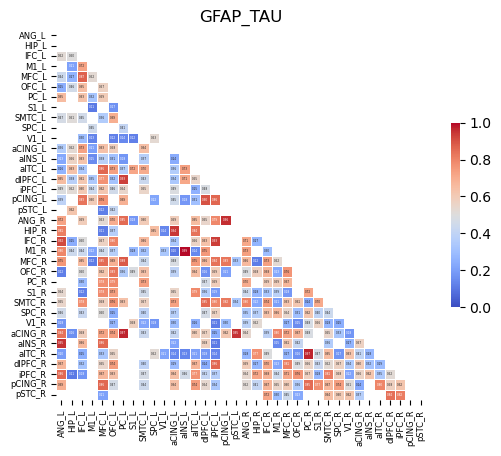

In [53]:
covMat = covGFAP_TAU_Drop
labels = LabelNames_GFAP_TAU_Drop
title = 'GFAP_TAU'

viz.drawCovMatrix(covMat, labels, labels, title, outputDir = gfap_ferritin_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

## TAU - Ferritin

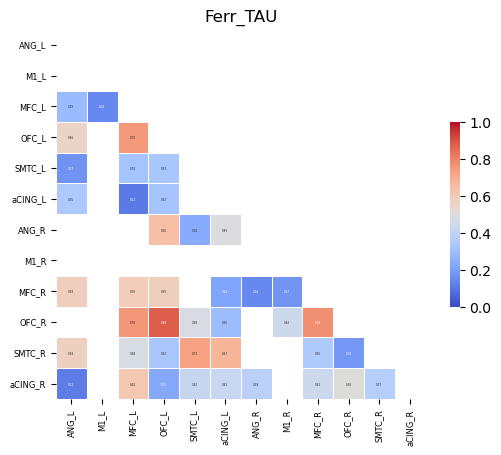

In [54]:
covMat = covFerr_TAU_Drop
labels = LabelNames_Ferr_TAU_Drop
title = 'Ferr_TAU'

viz.drawCovMatrix(covMat, labels, labels, title, outputDir = gfap_ferritin_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

## TDP - GFAP

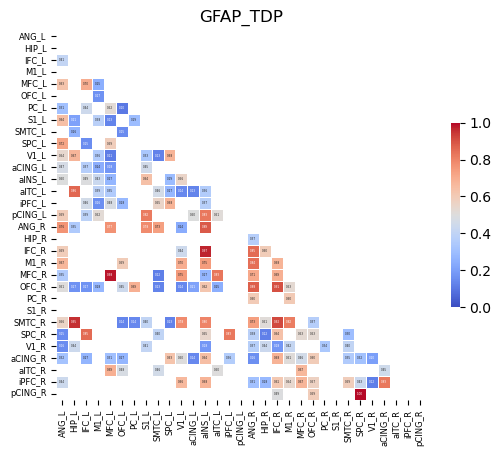

In [55]:
covMat = covGFAP_TDP_Drop
labels = LabelNames_GFAP_TDP_Drop
title = 'GFAP_TDP'

viz.drawCovMatrix(covMat, labels, labels, title, outputDir = gfap_ferritin_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

## TDP - Ferritin

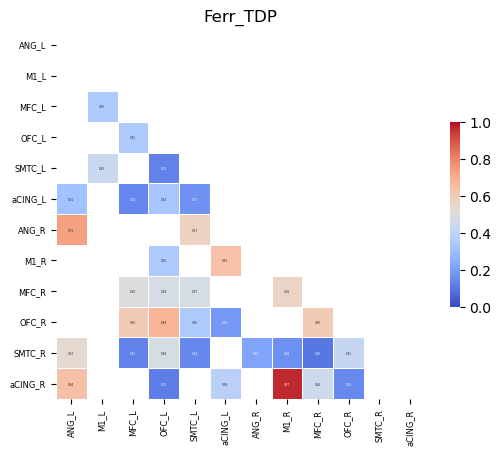

In [56]:
covMat = covFerr_TDP_Drop
labels = LabelNames_Ferr_TDP_Drop
title = 'Ferr_TDP'

viz.drawCovMatrix(covMat, labels, labels, title, outputDir = gfap_ferritin_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

## TAU > TDP - GFAP

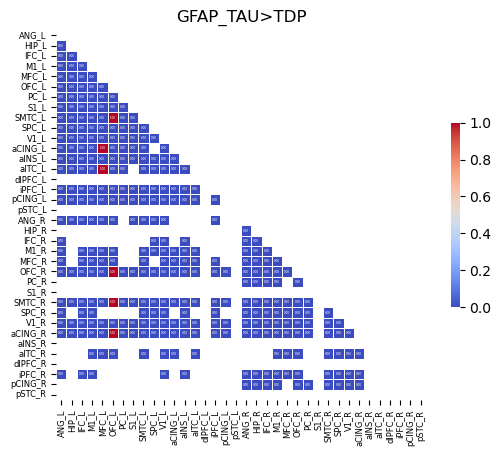

In [57]:
covMat = covGFAP_TAU_gt_TDP_Drop
labels = LabelNames_GFAP_TAU_Drop
title = 'GFAP_TAU>TDP'

viz.drawCovMatrix(covMat, labels, labels, title, outputDir = gfap_ferritin_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

## TDP > TAU - GFAP

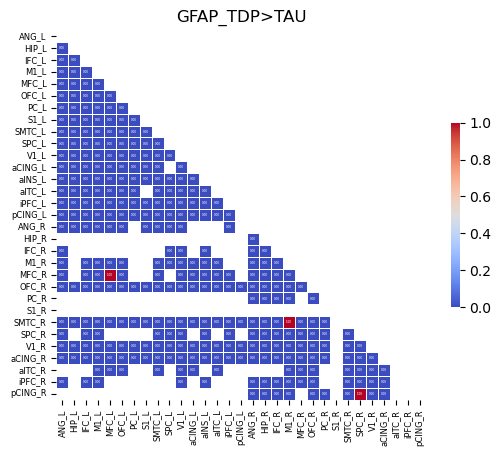

In [58]:
covMat = covGFAP_TDP_gt_TAU_Drop
labels = LabelNames_GFAP_TDP_Drop
title = 'GFAP_TDP>TAU'

viz.drawCovMatrix(covMat, labels, labels, title, outputDir = gfap_ferritin_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

## TAU > TDP - Ferritin

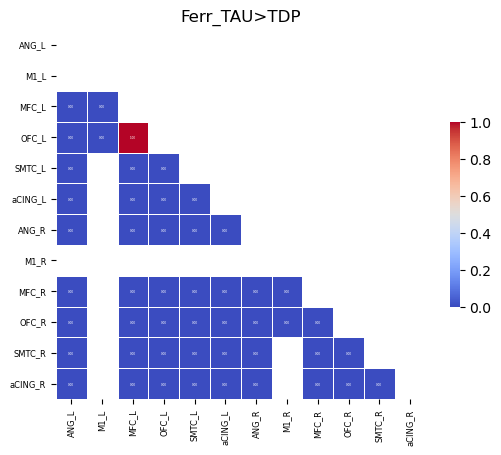

In [59]:
covMat = covFerr_TAU_gt_TDP_Drop
labels = LabelNames_Ferr_TAU_Drop
title = 'Ferr_TAU>TDP'

viz.drawCovMatrix(covMat, labels, labels, title, outputDir = gfap_ferritin_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)

## TDP > TAU - Ferritin

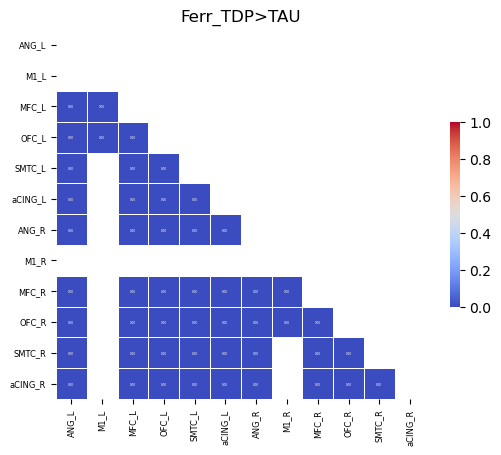

In [60]:
covMat = covFerr_TDP_gt_TAU_Drop
labels = LabelNames_Ferr_TDP_Drop
title = 'Ferr_TDP>TAU'

viz.drawCovMatrix(covMat, labels, labels, title, outputDir = gfap_ferritin_Fig,
                  annot_fontsize = 2, tick_fontsize = 6, annot_bool = True, save=True)